In [91]:
# Herzlich willkommen zu einem neuen Jupyter Notebook von 'The Erium Podcast'. Dieses Mal widmen wir uns dem Thema 
# 'Reinforcement Learning'. Im folgenden möchten wir einen Algorithmus darauf trainieren den kürzesten Weg zwischen zwei Punkten 
# zu finden.
# Dieses Dokument ist ein kleines add on zu der Folge "REINFORCEMENT LEARNING" von The Erium Podcast.
# Solltet ihr die Folge noch nicht gehört haben, tut das am besten direkt unter theeriumpodcast.de, auf Spotify oder 
# Apple Podcasts. So wird deutlicher was gleich hier passiert.
# Der Code für dieses Jupyter Noteboook stammt von der folgenden Website: 
# https://www.viralml.com/video-content.html?v=nSxaG_Kjw_w
# Er ist sehr schön, bietet einen guten einstieg in das Thema und lässt sich auch gut abstrahieren.

# Zunächst importieren wir die nötigen Bibliotheken.
import numpy as np
import pylab as plt
import networkx as nx

In [109]:
# Unsere Umgebung besteht aus 8 Punkten 0, ... ,7. Wir werden nun die möglichen Handlungen innerhalb dieser Umgebung festlegen
# und in einer Liste sammeln.
# Hierbei steht (x,y) für "gehe von x zu y":

points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7), (5,2)]

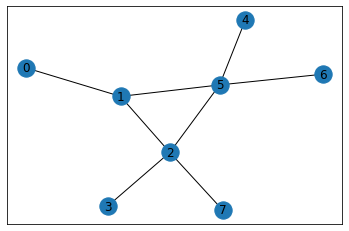

In [110]:
# Wir legen nun unser Ziel fest: "Erreiche vom Punkt 0 aus den Punkt 7".
goal = 7

# Schauen wir uns dazu mal die folgende Grafik an die das Netzwerk und seine möglcihen Verbindungen angibt:
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [111]:
# Der Grafik und unserer Liste entnehmen wir das der Weg, den wir wollen, (0,1),(1,2),(2,7) ist. 
# Das soll unser Algorithmus nun lernen und am Ende ausspucken.

In [112]:
# Wir erstellen nun unsere Rewards in Form von einer Matrix.

MATRIX_SIZE = 8

reward = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
reward *= -1

In [113]:
reward

matrix([[-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.]])

In [122]:
# Natürlich sollte hier nicht überall der negative Reward "-1" stehen. Diese for-Schleife setzt die zu erreichenden Tupel (2,7)
# und (7,7) auf 100 (positiver Reward).
for point in points_list:
    if point[1] == goal:
        reward[point] = 100
    else:
        reward[point] = 0

    if point[0] == goal:
        reward[point[::-1]] = 100
    else:
        reward[point[::-1]]= 0

reward[goal,goal]= 100

In [123]:
reward

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,   0.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,   0.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [124]:
# Das hier ist nun das gehirn unsereres Algorithmus. Es besteht aus drei Funktionen.

Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
gamma = 0.8

initial_state = 1

# Diese Funktion gibt die möglichen Handlungen je nach zustand aus.
def available_actions(state):
    current_state_row = reward[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state)

# Diese Funktion wählt zufällig eine der möglichen Handlungen aus.
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

# Und diese Funktion schickt uns mit den vorherigen beiden Funktionen in den nächsten Zustand.
def update(current_state, action, gamma):

  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]

  Q[current_state, action] = reward[current_state, action] + gamma * max_value
  print('max_value', reward[current_state, action] + gamma * max_value)

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

update(initial_state, action, gamma)


max_value 0.0


0

In [125]:
# Wir trainieren nun unser "Gehirn". dabei fangen wir immer zufällig bei einem der möglichen Zustände an. Was am Ende rauskommt
# ist die veränderte Matrix Q, welche im Wesentlichen unsere Policy darstellt, welche den Reward maximiert.

scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

print("Trained Q matrix:")
print(Q/np.max(Q)*100)

max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 180.0
Score: 155.55555555555554
max_value 144.0
Score: 235.55555555555554
max_value 144.0
Score: 315.55555555555554
max_value 215.2
Score: 317.47211895910783
max_value 144.0
Score: 384.3866171003718
max_value 115.2
Score: 437.9182156133829
max_value 115.2
Score: 491.4498141263941
max_value 92.16000000000001
Score: 534.275092936803
max_value 92.16000000000001
Score: 577.100371747212
max_value 144.0
Score: 577.100371747212
max_value 92.16000000000001
Score: 577.100371747212
max_value 0.0
Score: 577.100371747212
max_value 144.

max_value 282.11409348198407
Score: 1118.8309997609936
max_value 352.6426168524801
Score: 1118.8309997609936
max_value 352.6426168524801
Score: 1118.8309997609936
max_value 225.69127478558727
Score: 1118.8309997609936
max_value 282.11409348198407
Score: 1118.8309997609936
max_value 282.11409348198407
Score: 1118.8309997609936
max_value 282.11409348198407
Score: 1118.8309997609936
max_value 282.11409348198407
Score: 1118.8309997609936
max_value 352.6426168524801
Score: 1118.8309997609936
max_value 352.6426168524801
Score: 1118.8309997609936
max_value 282.11409348198407
Score: 1118.8309997609936
max_value 282.11409348198407
Score: 1118.8309997609936
max_value 282.11409348198407
Score: 1118.8309997609936
max_value 352.6426168524801
Score: 1118.8309997609936
max_value 282.11409348198407
Score: 1118.8309997609936
max_value 282.11409348198407
Score: 1118.8309997609936
max_value 282.11409348198407
Score: 1118.8309997609936
max_value 352.6426168524801
Score: 1118.8309997609936
max_value 352.64

Score: 1172.6597523165483
max_value 317.396500328413
Score: 1172.6597523165483
max_value 317.396500328413
Score: 1172.6597523165483
max_value 317.396500328413
Score: 1172.6597523165483
max_value 317.396500328413
Score: 1172.6597523165483
max_value 396.74562541051625
Score: 1172.6597523165483
max_value 499.3175081820916
Score: 1172.937060778777
max_value 317.396500328413
Score: 1172.937060778777
max_value 317.396500328413
Score: 1172.937060778777
max_value 317.396500328413
Score: 1172.937060778777
max_value 317.396500328413
Score: 1172.937060778777
max_value 317.396500328413
Score: 1172.937060778777
max_value 317.396500328413
Score: 1172.937060778777
max_value 317.396500328413
Score: 1172.937060778777
max_value 317.396500328413
Score: 1172.937060778777
max_value 399.45400654567334
Score: 1173.4794773956144
max_value 317.396500328413
Score: 1173.4794773956144
max_value 399.45400654567334
Score: 1174.0218940124514
max_value 317.396500328413
Score: 1174.3151880670903
max_value 317.39650032

max_value 319.7204513513848
Score: 1184.4037270162135
max_value 319.7204513513848
Score: 1184.4037270162135
max_value 319.7204513513848
Score: 1184.435183442901
max_value 319.7204513513848
Score: 1184.435183442901
max_value 319.7204513513848
Score: 1184.435183442901
max_value 399.650564189231
Score: 1184.435183442901
max_value 319.7204513513848
Score: 1184.435183442901
max_value 499.90839749882184
Score: 1184.3855058541337
max_value 399.650564189231
Score: 1184.3855058541337
max_value 399.650564189231
Score: 1184.3855058541337
max_value 319.7204513513848
Score: 1184.3855058541337
max_value 319.7204513513848
Score: 1184.3855058541337
max_value 319.7204513513848
Score: 1184.3855058541337
max_value 255.77636108110784
Score: 1184.3855058541337
max_value 399.650564189231
Score: 1184.3855058541337
max_value 399.650564189231
Score: 1184.3855058541337
max_value 319.7204513513848
Score: 1184.3855058541337
max_value 319.7204513513848
Score: 1184.3855058541337
max_value 399.650564189231
Score: 11

In [126]:
# Jetzt wird getestet. Wir verlangen hier nun von unserem Algortihmus den optimalen Weg von 0 zu 7:
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

Most efficient path:
[0, 1, 2, 7]


In [127]:
# Das ist genau das was wir auch rausbekommen ahebn. Der Algorithmus tut also das was er tun soll und hat gelernt den 
# kürzesten Weg zu nehmen.

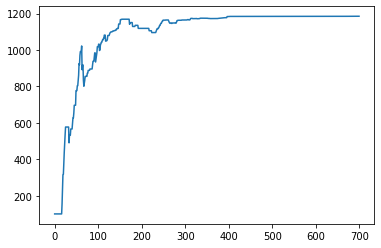

In [128]:
# Zum Abschluss hier noch eine Grafik, die die Genauigkeit im Verlauf des Tranings zeigt. Wir sehen hier wie unser Algorithmus
# immer besser wurde.
plt.plot(scores)
plt.show()

In [27]:
# Ihr würdet das Reinforcement Learning hier anders gestalten oder habt noch Bemerkungen? Dann raus damit!
# Schreibt uns direkt an podcast@erium.de, auf LinkedIn, Facebook, Twitter oder Instagram!

# Danke fürs Anschauen dieser Jupyter Notebook Datei und Hören des Podcasts. Seid auch gespannt auf die nächste Folge von 
# The Erium Podcast in der wir euch alles Wissenswerte zu Data Visualizations erzählen! :D